In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
from load_data import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
df=load()

In [5]:
df.head(10)

,RegionID,SizeRankZip,RegionName,RegionType,State,City,Metro,CountyName,ZHVI 2003,ZHVI 2008,...,Transit Jobs,Transit Trips/Week,Transit Routes,Transit Shed (sq mi),Transit percentage,Population,Unnamed: 0,STATEFP,COUNTYFP,NatWalkInd
0,91982,1,77494,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,215776.356117,244120.000781,...,56,40,0.0,0.0,0.013,"24,783",38085.0,48.0,157.0,7.968900
1,91940,3,77449,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111490.450128,124187.861811,...,56,40,0.0,0.0,0.013,"24,783",38107.0,48.0,201.0,11.430193
2,91733,5,77084,zip,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,109631.516990,123577.558321,...,"218,774","1,900",5.0,31.0,0.039,"2,439,835",38107.0,48.0,201.0,11.430193
3,91926,11,77433,zip,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,197878.948831,221744.762112,...,NaN,NaN,NaN,NaN,NaN,NaN,38107.0,48.0,201.0,11.430193
4,92036,25,77573,zip,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County,159151.702851,190430.187900,...,NaN,NaN,NaN,NaN,NaN,NaN,38090.0,48.0,167.0,7.878866
5,91968,51,77479,zip,TX,Sugar Land,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,244414.374629,283323.404144,...,NaN,NaN,NaN,NaN,NaN,NaN,38085.0,48.0,157.0,7.968900
6,91922,62,77429,zip,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,163125.610550,187884.169987,...,NaN,NaN,NaN,NaN,NaN,NaN,38107.0,48.0,201.0,11.430193
7,92045,75,77584,zip,TX,Pearland,"Houston-The Woodlands-Sugar Land, TX",Brazoria County,181722.812581,203321.328568,...,417,20,0.0,0.0,0.003,"114,122",38026.0,48.0,39.0,6.298689
8,91889,88,77379,zip,TX,Spring,"Houston-The Woodlands-Sugar Land, TX",Harris County,164893.900219,186980.525226,...,0,0,0.0,0.0,0.013,"55,243",38107.0,48.0,201.0,11.430193
9,91950,120,77459,zip,TX,Missouri City,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,188558.030624,212994.995651,...,"8,336",193,1.0,3.0,0.013,"79,219",38085.0,48.0,157.0,7.968900


In [6]:
df.nunique()

RegionID       13293
SizeRankZip     9472
RegionName     13293
RegionType         1
State             48
               ...  
Population      1280
Unnamed: 0      1578
STATEFP           48
COUNTYFP         210
NatWalkInd      1464
Length: 64, dtype: int64

In [7]:
print(df.columns.tolist())

['RegionID', 'SizeRankZip', 'RegionName', 'RegionType', 'State', 'City', 'Metro', 'CountyName', 'ZHVI 2003', 'ZHVI 2008', 'ZHVI 2013', 'ZHVI 2018', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021', 'ZHVI 2022', 'ZHVI 2023', 'ZHVF BaseDate', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30', 'ZHVF 2025-01-31', 'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021', 'ZORI 2022', 'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019', 'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022', 'Sale Listings 2023', 'Sales 2013', 'Sales 2018', 'Sales 2019', 'Sales 2020', 'Sales 2021', 'Sales 2022', 'Sales 2023', 'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021', 'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018', 'New Construction 2019', 'New Construction 2020', 'New Construction 2021', 'New Construction 2022', 'New Construction 2023', 'Transit Rank', 'Transit Score', 'Transit TCI', 'Transit Jobs', 'Transit Trips/Week', 'Transit Routes', 'Transit Shed (sq mi)', 'Transit percentage

In [8]:
df = df.dropna(subset=['ZHVI 2019', 'ZORI 2019', 'Transit Score'])

In [21]:
df = df.dropna(subset=['Sales 2019','RegionID'])

<Axes: xlabel='ZHVI 2019', ylabel='ZORI 2019'>

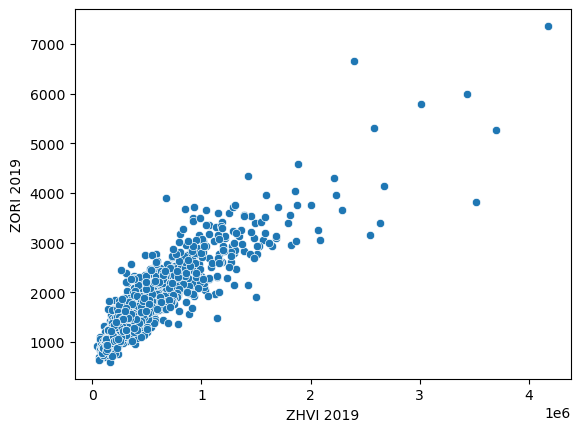

In [22]:
sns.scatterplot(df, x="ZHVI 2019", y="ZORI 2019")

In [ ]:
#More the value of the house more is the observed rent 

<Axes: xlabel='ZHVI 2019', ylabel='Sales 2019'>

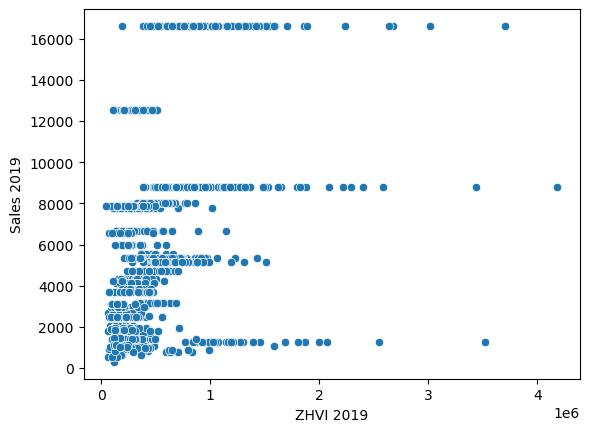

In [24]:
sns.scatterplot(df, y="Sales 2019", x= "ZHVI 2019")

<Axes: xlabel='Sales 2019', ylabel='Count'>

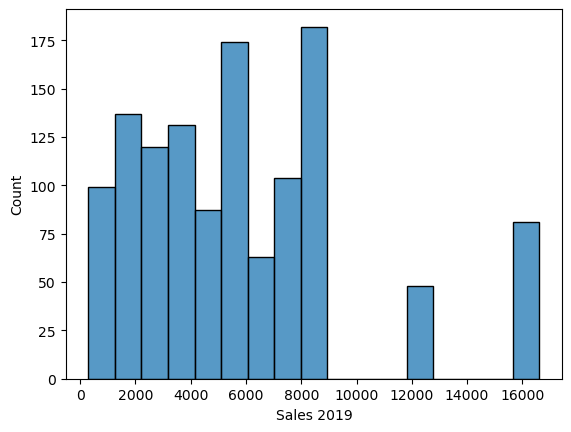

In [26]:
sns.histplot(df, x="Sales 2019")

<Axes: xlabel='ZHVI 2019', ylabel='Count'>

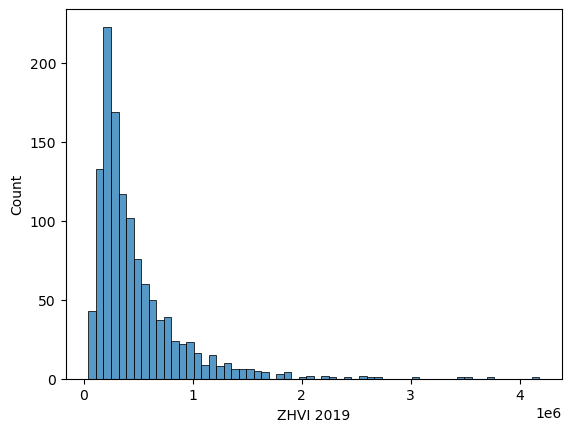

In [27]:
sns.histplot(df, x="ZHVI 2019")

<Axes: xlabel='ZORI 2019', ylabel='Count'>

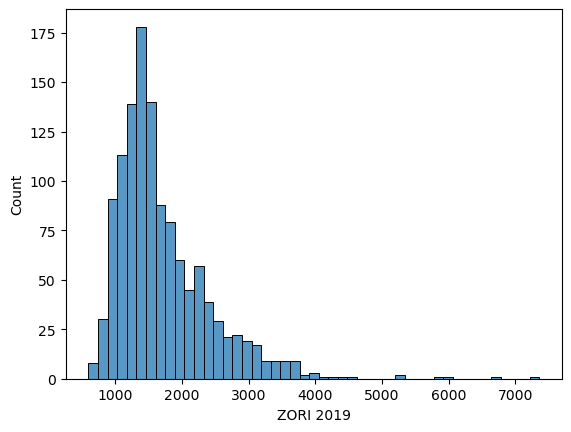

In [28]:
sns.histplot(df, x="ZORI 2019")

In [35]:
ZHVI2019_zscores = zscore(df["ZHVI 2019"])
SALES2019_zscores = zscore(df["Sales 2019"])

<Axes: xlabel='ZHVI 2019', ylabel='Sales 2019'>

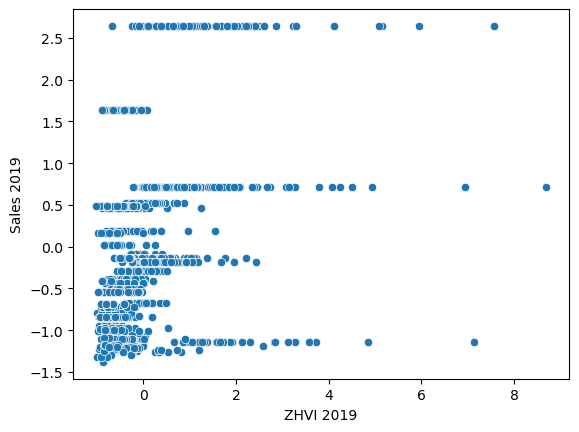

In [36]:
sns.scatterplot(x=ZHVI2019_zscores, y=SALES2019_zscores)

In [38]:

scaler = StandardScaler().fit(df[['ZHVI 2019', 'Sales 2019']])
data_scaled = scaler.transform(df[['ZHVI 2019', 'Sales 2019']])
zhvi2019_scaled = data_scaled[:, 0]
sales2019_scaled = data_scaled[:, 1]

<Axes: >

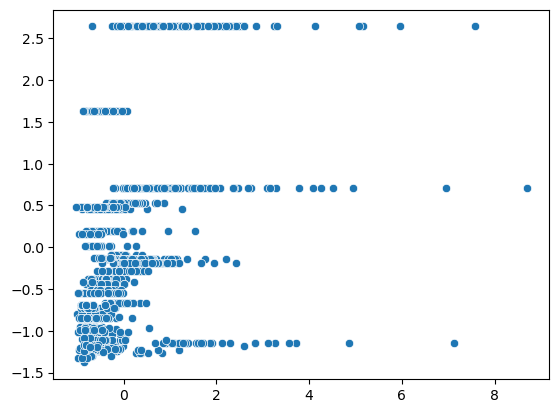

In [40]:

sns.scatterplot(x=zhvi2019_scaled , y=sales2019_scaled)

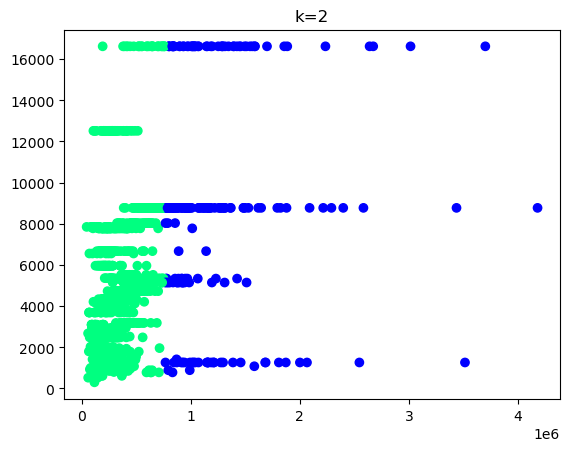

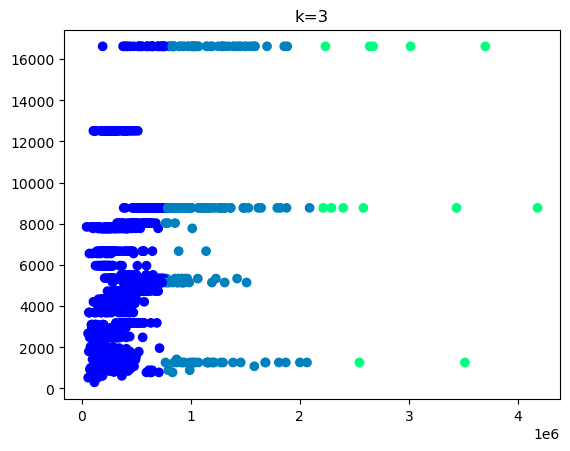

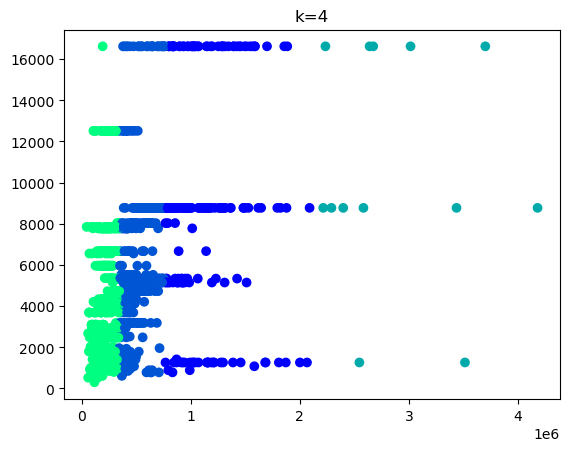

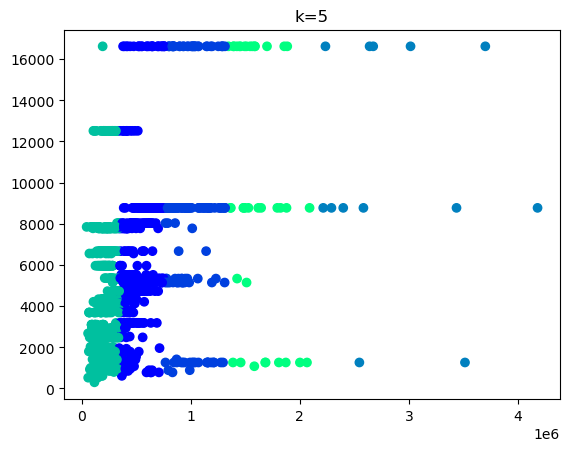

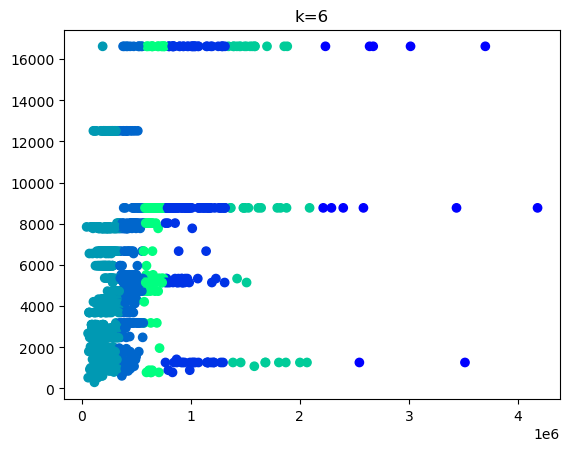

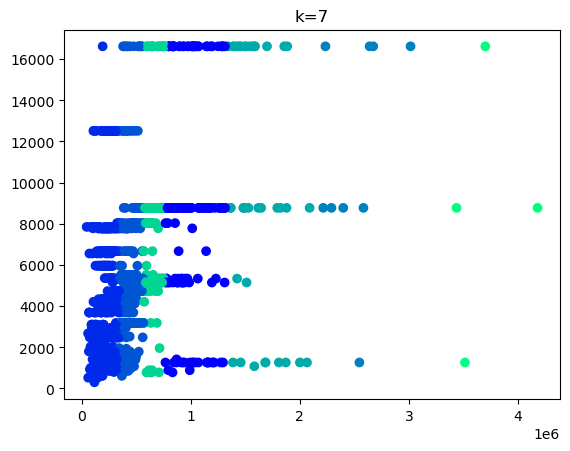

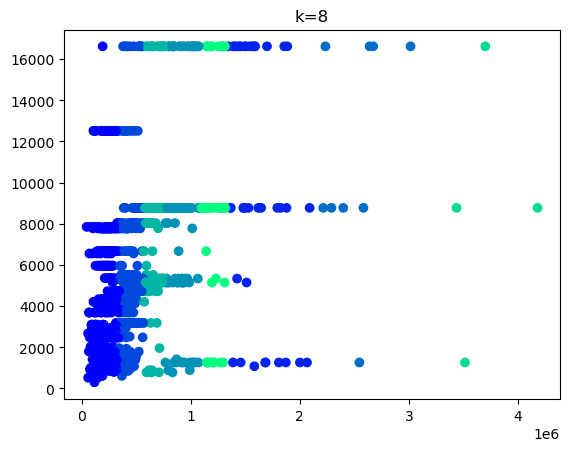

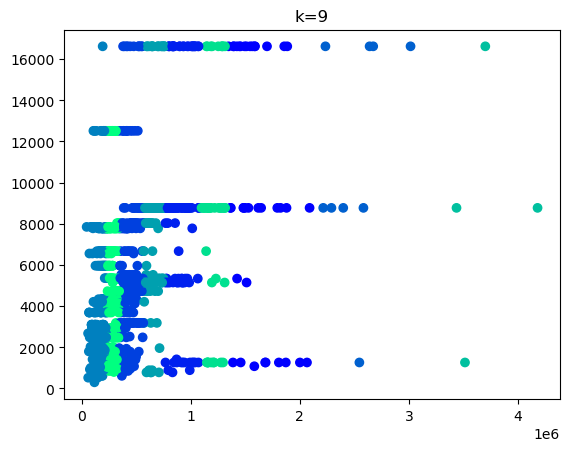

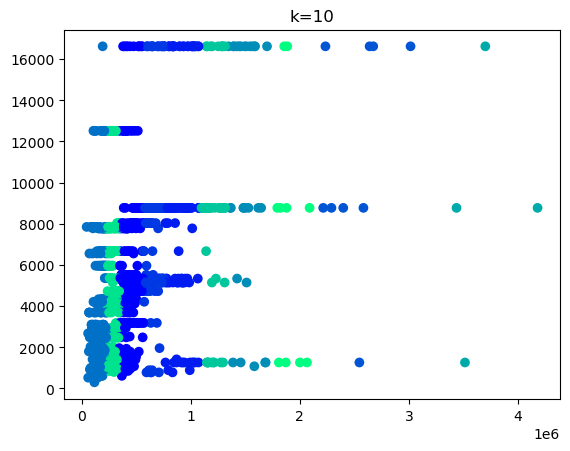

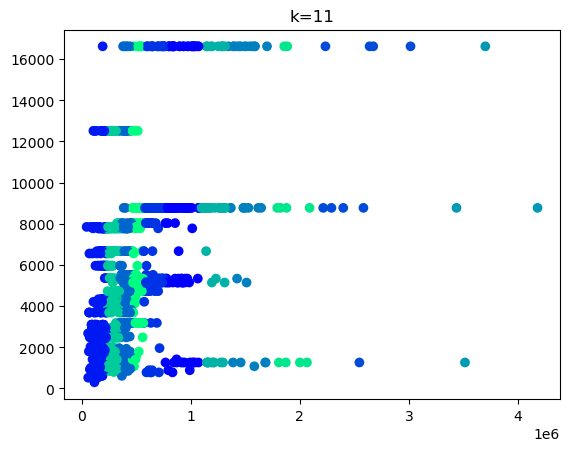

<Figure size 640x480 with 0 Axes>

In [43]:
for k in range(2, 12):
    plt.scatter(df['ZHVI 2019'], df['Sales 2019'],
           c = AgglomerativeClustering(n_clusters = k).fit_predict(df[['ZHVI 2019', 'Sales 2019']]), cmap =plt.cm.winter)
    plt.title(f"k={k}")
    plt.show()
    plt.clf()

In [44]:
for k in range(2, 8):
    print(f"k={k}")
    clusters = AgglomerativeClustering(n_clusters = k).fit_predict(df[['ZHVI 2019', 'Sales 2019']])
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print("==========")

k=2
Cluster 0 count: 201
Cluster 1 count: 1025
k=3
Cluster 0 count: 1025
Cluster 1 count: 188
Cluster 2 count: 13
k=4
Cluster 0 count: 188
Cluster 1 count: 416
Cluster 2 count: 13
Cluster 3 count: 609
k=5
Cluster 0 count: 416
Cluster 1 count: 150
Cluster 2 count: 13
Cluster 3 count: 609
Cluster 4 count: 38
k=6
Cluster 0 count: 13
Cluster 1 count: 150
Cluster 2 count: 287
Cluster 3 count: 609
Cluster 4 count: 38
Cluster 5 count: 129
k=7
Cluster 0 count: 150
Cluster 1 count: 609
Cluster 2 count: 287
Cluster 3 count: 9
Cluster 4 count: 38
Cluster 5 count: 129
Cluster 6 count: 4


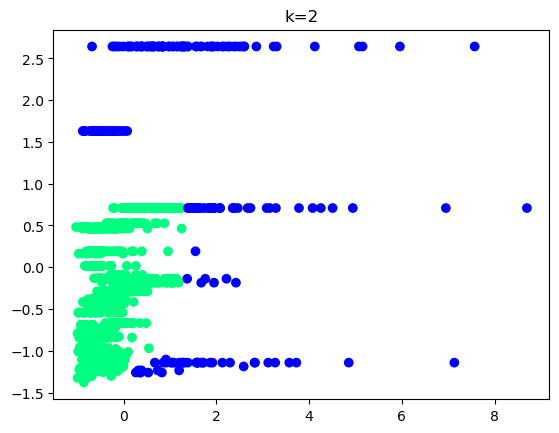

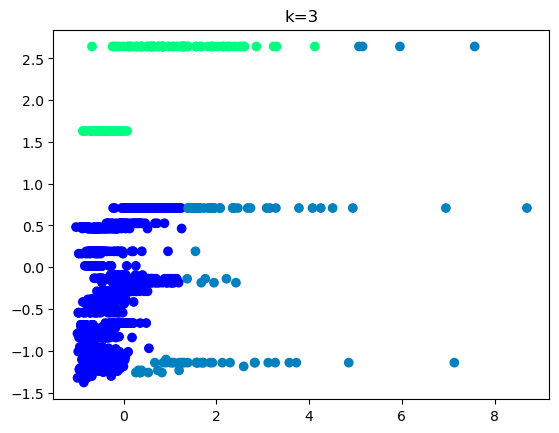

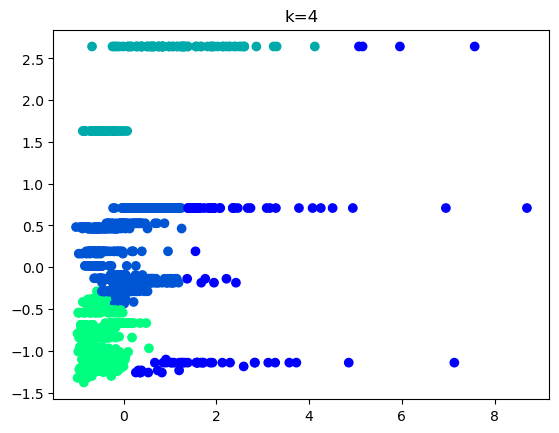

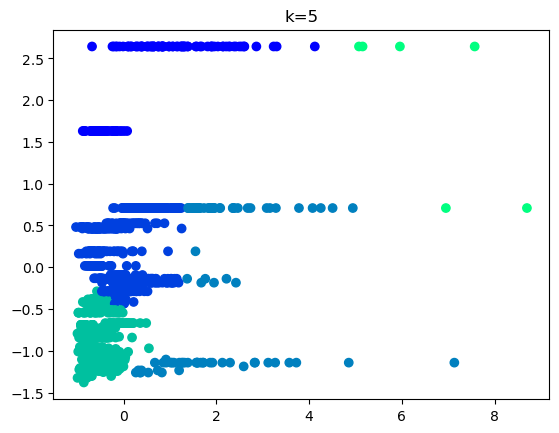

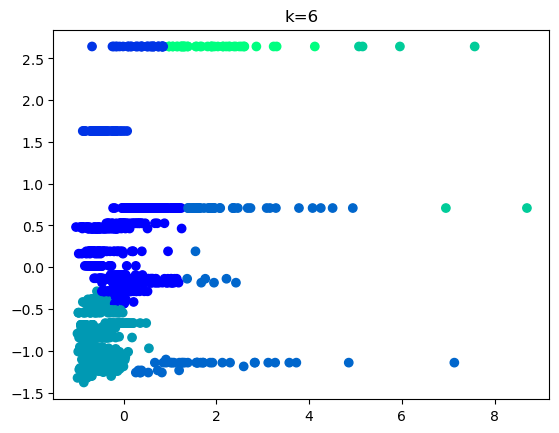

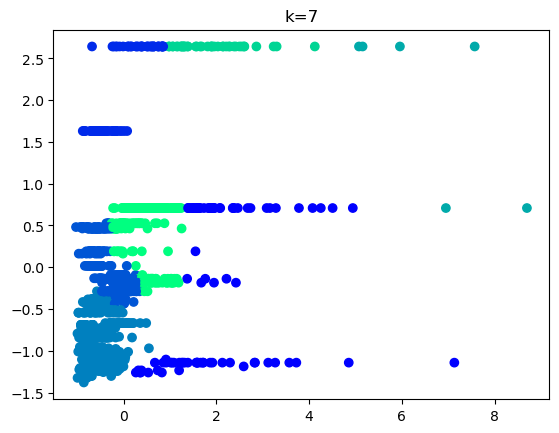

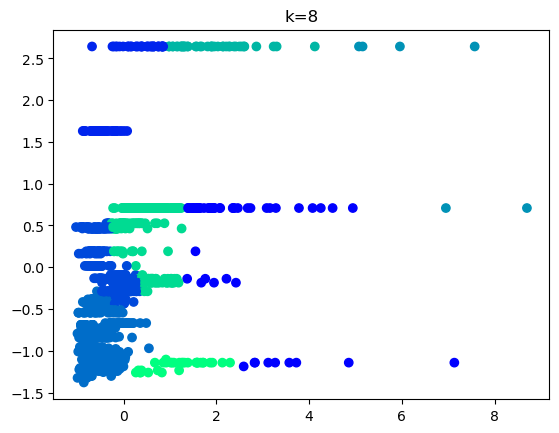

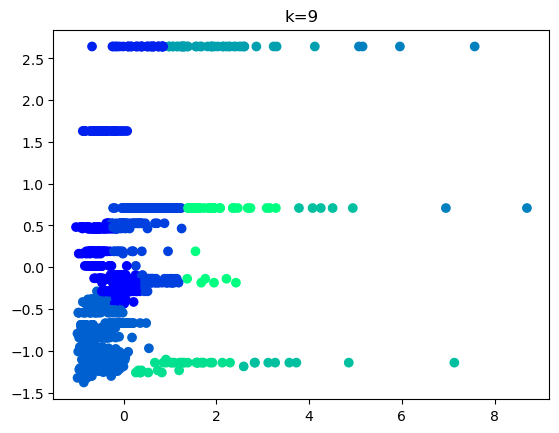

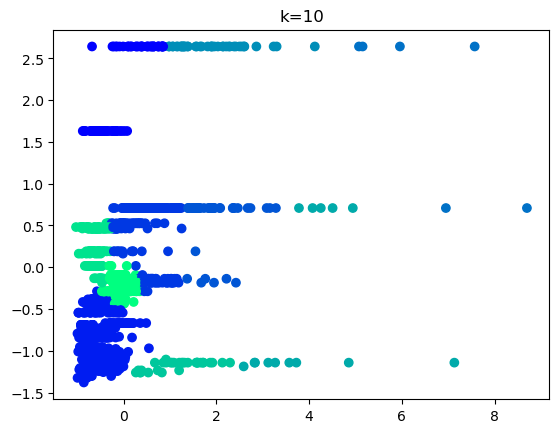

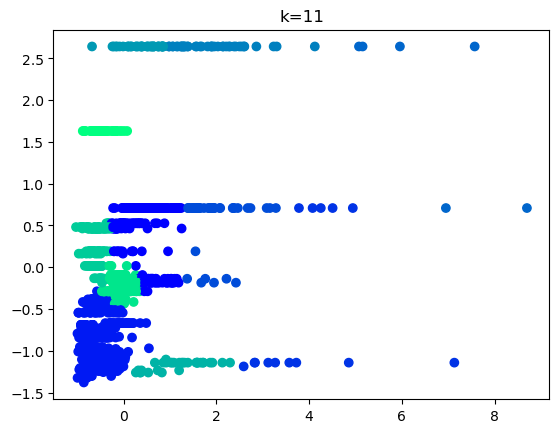

<Figure size 640x480 with 0 Axes>

In [48]:
for k in range(2, 12):
    # Visualizing the clustering

    plt.scatter(zhvi2019_scaled, sales2019_scaled,
            c = AgglomerativeClustering(n_clusters = k).fit_predict(data_scaled), cmap =plt.cm.winter)
    plt.title(f"k={k}")
    plt.show()
    plt.clf()

In [50]:
for k in range(2, 12):
    print(f"k={k}")
    clusters = AgglomerativeClustering(n_clusters = k).fit_predict(data_scaled)
    unique, counts = np.unique(clusters, return_counts=True)
    for item in np.asarray((unique, counts)).T:
        print(f"Cluster {item[0]} count: {item[1]}")
    print("==========")

k=2
Cluster 0 count: 216
Cluster 1 count: 1010
k=3
Cluster 0 count: 1010
Cluster 1 count: 91
Cluster 2 count: 125
k=4
Cluster 0 count: 91
Cluster 1 count: 544
Cluster 2 count: 125
Cluster 3 count: 466
k=5
Cluster 0 count: 125
Cluster 1 count: 544
Cluster 2 count: 85
Cluster 3 count: 466
Cluster 4 count: 6
k=6
Cluster 0 count: 544
Cluster 1 count: 85
Cluster 2 count: 85
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
k=7
Cluster 0 count: 85
Cluster 1 count: 85
Cluster 2 count: 319
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
Cluster 6 count: 225
k=8
Cluster 0 count: 53
Cluster 1 count: 85
Cluster 2 count: 319
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
Cluster 6 count: 225
Cluster 7 count: 32
k=9
Cluster 0 count: 319
Cluster 1 count: 85
Cluster 2 count: 225
Cluster 3 count: 466
Cluster 4 count: 6
Cluster 5 count: 40
Cluster 6 count: 14
Cluster 7 count: 32
Cluster 8 count: 39
k=10
Cluster 0 count: 85
Cluster 1 count: 466
Cluster 2 count: 225
Clu

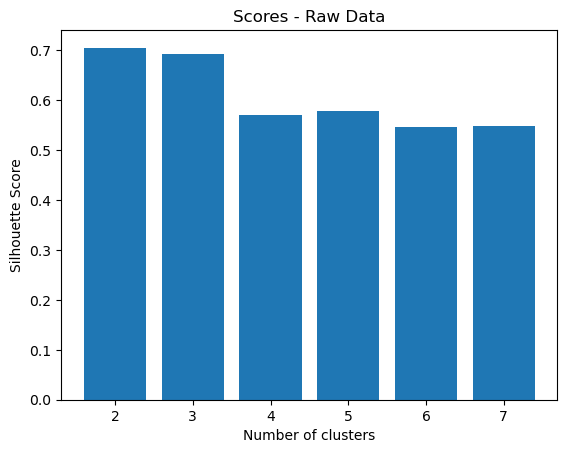

In [53]:
silhouette_scores = []

for k in range(2, 8):
    silhouette_scores.append(
        silhouette_score(df[['ZHVI 2019', 'Sales 2019']], AgglomerativeClustering(n_clusters = k).fit_predict(df[['ZHVI 2019', 'Sales 2019']])))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title("Scores - Raw Data")
plt.show()

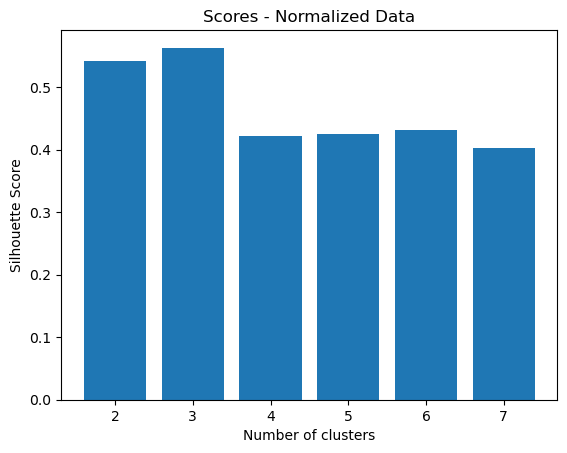

In [54]:
silhouette_scores = []

for k in range(2, 8):
    silhouette_scores.append(
        silhouette_score(data_scaled, AgglomerativeClustering(n_clusters = k).fit_predict(data_scaled)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title("Scores - Normalized Data")
plt.show()